# Machine-Learning-Based Malware Detection
#### COSI-107a Introduction to Computer Security Final Project
##### Hsin-Chen Hu, hhu@brandeis.edu
##### May 2025

First we will read the csv file. This chosen csv file is found online in mburakergenc's GitHub repository. (Visit his repository here: https://github.com/mburakergenc/Malware-Detection-using-Machine-Learning/blob/master/data.csv) This dataset was chosen because the features have already been vectorized, and each entry is labeled as either malware or benign in the classification column. This structure makes it suitable for training a supervised machine learning model.

In [8]:
import pandas as pd

training_path = '../data/data.csv'
target = 'classification'

DataFrame = pd.read_csv(training_path)
DataFrame.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


After we've successfully read in the data and made sure the data could be shown in a table, we'll proceed to preprocess the data.\
Here we split the whole dataset into 2 parts: the features and the label. The label would be the 'classification' column. It labels the entries into 'malware' and 'benign'.\
For the other features, we encode the 'hash' column using one-hot encoder, and impute the missing cells with SimpleImputer. Finally, we scale the features so that non of them are disproportionately important and then in turn harm the performance and outcome of the models.

In [20]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

training_path = '../data/data.csv'
raw_training_data = pd.read_csv(training_path)
targets = 'classification'

non_numeric_cols = ["hash"]
numeric = [col for col in raw_training_data.columns if col not in non_numeric_cols + [targets]]

preprocess_pipeline = ColumnTransformer([
    ('one_hot', OneHotEncoder(sparse_output=False, handle_unknown="ignore"), non_numeric_cols),
    ('num_pipeline', Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ]), numeric)
])

training_data_y = raw_training_data[targets].to_numpy()
training_data_x = preprocess_pipeline.fit_transform(raw_training_data.drop(columns=[targets]))

Scikit-learn provides lots of useful classifiers to train the model with. In this project, we will focus on knn, decision trees, random forests, and linear support vector machine. Here we train our models with the dataset and print out their prediction and the actual labels.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(training_data_x, training_data_y)
print("knn predicted labels:")
print(knn_clf.predict(training_data_x))
print("actual labels:")
print(training_data_y)
print("--------------------------------------------------------------")

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(training_data_x, training_data_y)
print("decision tree predicted labels:")
print(tree_clf.predict(training_data_x))
print("actual labels:")
print(training_data_y)
print("--------------------------------------------------------------")

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
forest_clf.fit(training_data_x, training_data_y)
print("random forest predicted labels:")
print(forest_clf.predict(training_data_x))
print("actual labels:")
print(training_data_y)
print("--------------------------------------------------------------")

svm_clf = LinearSVC()
svm_clf.fit(training_data_x, training_data_y)
print("svm predicted labels:")
print(svm_clf.predict(training_data_x))
print("actual labels:")
print(training_data_y)

knn predicted labels:
['malware' 'malware' 'malware' ... 'malware' 'malware' 'malware']
actual labels:
['malware' 'malware' 'malware' ... 'malware' 'malware' 'malware']
--------------------------------------------------------------
decision tree predicted labels:
['malware' 'malware' 'malware' ... 'malware' 'malware' 'malware']
actual labels:
['malware' 'malware' 'malware' ... 'malware' 'malware' 'malware']
--------------------------------------------------------------
random forest predicted labels:
['malware' 'malware' 'malware' ... 'malware' 'malware' 'malware']
actual labels:
['malware' 'malware' 'malware' ... 'malware' 'malware' 'malware']
--------------------------------------------------------------
svm predicted labels:
['malware' 'malware' 'malware' ... 'malware' 'malware' 'malware']
actual labels:
['malware' 'malware' 'malware' ... 'malware' 'malware' 'malware']


Lastly, we evaluate the performance of our models. There are different ways to evaluate a machine learning model. For each model, we evaluate and compare its performance based on its f1 scores, confusion matrix and the ROC curve.

Average confusion matrix of kNN: 
[[37819 12181]
 [ 9113 40887]]
F1 score of kNN: 
0.793398533007335


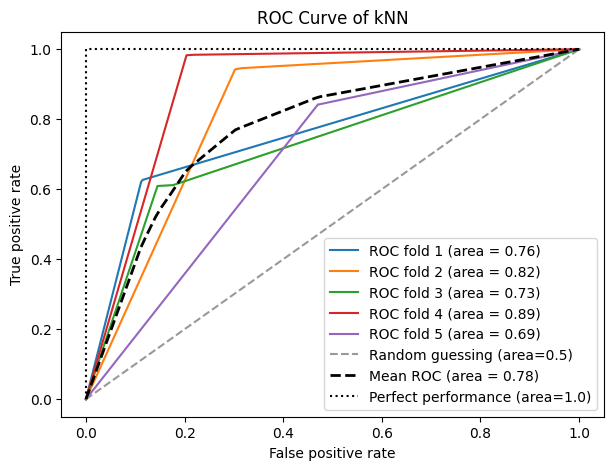

In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, StratifiedKFold

# knn
y_pred_knn = cross_val_predict(knn_clf, training_data_x, training_data_y, cv=10)
confmat_knn = confusion_matrix(training_data_y, y_pred_knn)
print("Average confusion matrix of kNN: ")
print(confmat_knn)

f1_val_knn = f1_score(y_true=training_data_y, y_pred=y_pred_knn, pos_label="malware")
print("F1 score of kNN: ")
print(f1_val_knn)

cv = list(StratifiedKFold(n_splits=5).split(training_data_x, training_data_y))
plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    y_scores_knn = knn_clf.fit(training_data_x[train], training_data_y[train]).predict_proba(training_data_x[test])[:, 1]
    fpr, tpr, _ = roc_curve(training_data_y[test], y_scores_knn, pos_label="malware")

    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='Random guessing (area=0.5)')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='Perfect performance (area=1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve of kNN')
plt.legend(loc='lower right')
plt.show()

Average confusion matrix of Decision Tree: 
[[41654  8346]
 [ 3989 46011]]
F1 score of Decision Tree: 
0.8817999750855238


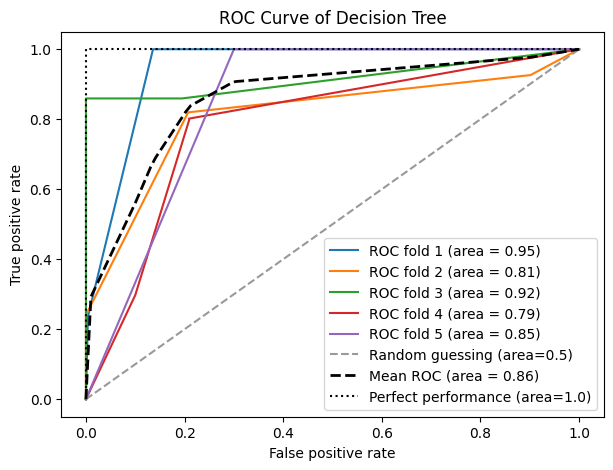

In [38]:
# Decision Tree
y_pred_tree = cross_val_predict(tree_clf, training_data_x, training_data_y, cv=10)
confmat_tree = confusion_matrix(training_data_y, y_pred_tree)
print("Average confusion matrix of Decision Tree: ")
print(confmat_tree)

f1_val_tree = f1_score(y_true=training_data_y, y_pred=y_pred_tree, pos_label="malware")
print("F1 score of Decision Tree: ")
print(f1_val_tree)

cv = list(StratifiedKFold(n_splits=5).split(training_data_x, training_data_y))
plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    y_scores_tree = tree_clf.fit(training_data_x[train], training_data_y[train]).predict_proba(training_data_x[test])[:, 1]
    fpr, tpr, _ = roc_curve(training_data_y[test], y_scores_tree, pos_label="malware")

    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='Random guessing (area=0.5)')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='Perfect performance (area=1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve of Decision Tree')
plt.legend(loc='lower right')
plt.show()

Average confusion matrix of Random Forest: 
[[46628  3372]
 [ 6719 43281]]
F1 score of Random Forest: 
0.8955955842032839


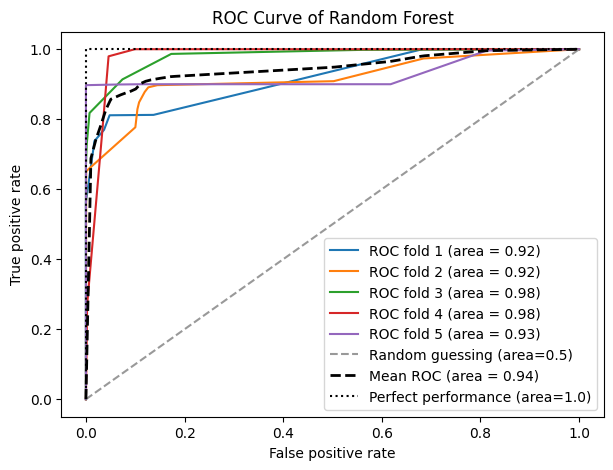

In [39]:
# Random Forest
y_pred_forest = cross_val_predict(forest_clf, training_data_x, training_data_y, cv=10)
confmat_forest = confusion_matrix(training_data_y, y_pred_forest)
print("Average confusion matrix of Random Forest: ")
print(confmat_forest)

f1_val_forest = f1_score(y_true=training_data_y, y_pred=y_pred_forest, pos_label="malware")
print("F1 score of Random Forest: ")
print(f1_val_forest)

cv = list(StratifiedKFold(n_splits=5).split(training_data_x, training_data_y))
plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    y_scores_forest = forest_clf.fit(training_data_x[train], training_data_y[train]).predict_proba(training_data_x[test])[:, 1]
    fpr, tpr, _ = roc_curve(training_data_y[test], y_scores_forest, pos_label="malware")

    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='Random guessing (area=0.5)')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='Perfect performance (area=1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve of Random Forest')
plt.legend(loc='lower right')
plt.show()

Average confusion matrix of SVM: 
[[40880  9120]
 [ 6920 43080]]
F1 score of SVM: 
0.8430528375733856


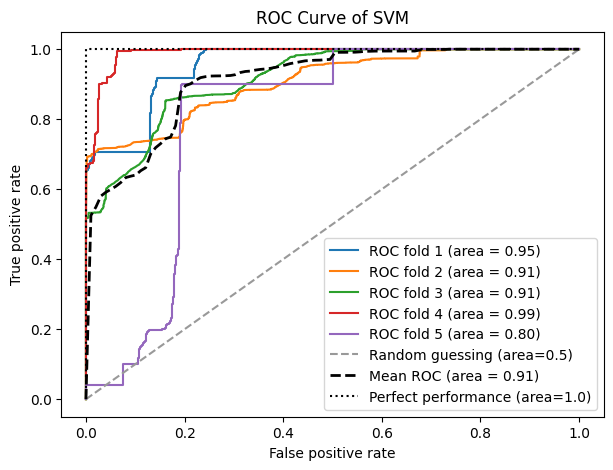

In [40]:
# Linear Support Vector Machine
y_pred_svm = cross_val_predict(svm_clf, training_data_x, training_data_y, cv=10)
confmat_svm = confusion_matrix(training_data_y, y_pred_svm)
print("Average confusion matrix of SVM: ")
print(confmat_svm)

f1_val_svm = f1_score(y_true=training_data_y, y_pred=y_pred_svm, pos_label="malware")
print("F1 score of SVM: ")
print(f1_val_svm)

cv = list(StratifiedKFold(n_splits=5).split(training_data_x, training_data_y))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
plt.figure(figsize=(7, 5))

for i, (train, test) in enumerate(cv):
    y_scores_svm = svm_clf.fit(training_data_x[train], training_data_y[train]).decision_function(training_data_x[test])
    fpr, tpr, _ = roc_curve(training_data_y[test], y_scores_svm, pos_label="malware")
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='Random guessing (area=0.5)')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='Perfect performance (area=1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve of SVM')
plt.legend(loc='lower right')
plt.show()